### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###

# 2. Estratégia de controle ótimo para diminuir espalhamento de fake news em mídia social [Capítulo 15 de ref. 1]						 #

#### Julia Vaisburd Xexéo  (julia.xexeo@poli.ufrj.br), Ney Rafael Guindane da Silva Barbosa (ney.barbosa@poli.ufrj.br)

*****

### Índice

1. [Introdução](#1.-Introdução)
1. [Modelo Matemático](#2.-Modelo Mathemático)
1. [Solução](#3.-Solução)
1. [Resultados e Discussão](#4.-Resultados-e-discussão)
1. [Conclusão](#5.-Conclusão)

## 1. Introdução ##

Nos últimos anos, com o advento das redes sociais e sua disseminação, o espalhamento de fake news, notícias falsas, aumentou e foi potencializado pela rapidez desses novos meios de comunicação. Eventos como as eleições americanas em 2016, Brasileiras em 2018 e a epidemia de Covid 19, foram marcados pelo alto número de noticias falsas disseminadas nas redes sociais.

O nosso projeto tem como objetivo buscar o controle ótimo e também um preditivo de um modelo de espalhamento de fake news nas redes sociais, proposto no livro !!COLOCAR CITAÇÃO AQUI!!

No cenário que estamos considerando as noticias falsas são disseminadas não apenas em canais duvidosos, mas também em canais de noticias confiáveis da internet. Além disso, o governo está ciente que isso é uma possível ameaça e irá tomar medidas para converter e prevenir essa epidemia de falsas informações, antes que vire um pânico.

Por sorte, o governo tem acesso a modernas ferramentas de alerta e canais de distribuição direta de noticias, e é importante ressaltar que não importa para o governo se a noticia é realmente falsa ou verdadeira, apenas se ele quer diminuir ou aumentar o espalhamento da mesma. 

Levaremos em consideração que essa epidemia de informação começou antes do governo ficar ciente de seu perigo e assim parte da população já está espalhando as noticias e as recebendo.

O modelo de espalhamento de Fake News se assemelha a um modelo de pandemia, aonde há os infectados, que podem espalhar a doença, então no nosso caso serão chamados de espalhadores, que podem espalhar a notícia. Os não infectados, que no nosso caso serão chamados de ignorantes, que ainda podem se infectar e espalhar a notícia e os curados, que não se contaminam mais e assim não podem espalhar mais a notícia. 

No nosso modelo, não mostramos diretamente os curados, será algo implícito, o gráfico de população só terá espalhadores e ignorantes, então a diferença percentual para chegar a 100\% da população será o número de curados.   

Dessa forma , o objetivo do nosso controle será  impedir que as notícias falsas ganhem uma vida própria substancial dentro das redes sociais.

Assim, primeiramente a partir da perspectiva de controle sera definida a função objetiva e a estratégia de controle ótimo. Após a otimização dessa função, será introduzida restrições orçamentárias ao controle.
Depois, será proposto um modelo de controle em tempo real e estudaremos se os controles calculados são válidos na presença de incertezas.

## 2. Modelo matemático ##


Primeiramente temos as equações dinâmicas do problema , em que x\_1 é o número de ignorantes e x\_2 de espalhadores, o objetivo do controle é prevenir a fakenews de ser amplamente espalhada e assim, se uma porcentagem suficiente da população esta imunizada dessa noticia falsa, não ocorrerá um pandemia da notícia falsa.

Uma estratégia de imunização é a educação antes da noticia chegar ao ignorante, que funcionaria parecido com a vacinação, pois ao ser "vacinado" com a informação correta, o ignorante não espalhará a notícia falsa.

Com um baixo número de espalhadores e alto número de ignorantes educados, a noticia falsa não será amplamente divulgada. 

O número de ignorante e espalhadores no nosso sistema podem ser modelados pelas seguintes equações, em que $\beta$ e $\gamma$ são parâmetros utilizados nos sistemas epidemiológicos, representando a taxa de espalhamento e a taxa de diminuição, respectivamente. 

\begin{align*}
    &\dot{x_1}(t) = -\beta x_1(t)x_2(t) - b u(t) x_1(t)\\
    &\dot{x_2}(t) = \beta x_1(t)x_2(t) - \gamma x_2^2(t)
\end{align*}

$b u(t) x_1(t) $ é o nosso controle, que é a tentativa de reduzir o número de ignorantes por meio da educação. 

Para a formulação matemática teremos que discretizar a equação dinâmica, dessa forma obtendo as equações abaixo:

\begin{align*}
    &x\_1[k+1] =  x\_1[k] - \beta * x\_1[k] * x\_2[k] - b * u[k] * x\_1[k]\\
    &x\_2[k+1] = x\_2[k] + \beta * x\_1[k] * x\_2[k] - \gamma * x\_2[k] * x\_2[k]
\end{align*}

Além disso, teremos algumas restrições no sistema. Espalhadores, ignorantes e controle sempre positivos e soma dos espalhadores com ignorantes deverá ser menor que $\beta$ sobre $\gamma$

\begin{align*}
    &x\_1[k] >= 0\\
    &x\_2[k] >= 0\\
    &u[k] >= 0\\
    &x\_1[k] + x\_2[k] <= (\beta / \gamma)\\
\end{align*}

O valor inicial de $x_1 $e $x_2$ será definido de forma a soma inicial dele ser igual a 1, representando assim 100\% da população.

Por fim, teremos nossa função objetiva, em que desejamos chegar em um nível de imunização em um determinado tempo:

\begin{align*}
    J =\|{x_1(t) + x_2(t) - \frac{\gamma}{\beta}}\|^2
\end{align*}

Dessa forma, temos que a formulação do problema é:

$$
\begin{aligned}
\underset{x_1, x_2 \in \mathbb{R^n}}{\text{minimize}}\qquad&  \sum_{n=1}^{k} (x_1(k) + x_2(k) - \frac{\gamma}{\beta})^2 \\
\text{sujeito a:}\qquad& x_1[k], x_2[k], u[k] >= 0\\
&x_1[k] + x_2[k] <= (\gamma / \beta)\\
& x_1[k+1] = x_1[k] - \beta * x_1[k] * x_2[k] - b * u[k] * x_1[k]\\ 
& x_2[k+1] = x_2[k] + \beta * x_1[k] * x_2[k] - \gamma * x_2[k] * x_2[k]\\
\end{aligned}\\
$$

## 3. Solução ##

Nesta seção, coloque seu código em Julia + JuMP e resolva o problema proposto. Seu código deve ser limpo (não macarrônico!), de fácil leitura, bem comentado e anotado e deve compilar sem erros em Julia 1.x, x$\geq 1$! Não valem códigos em outras linguagens. **Vou rodar seu código para avaliar seu projeto**. Sugiro a utilização de múltiplos blocos de códigos separados por blocos de texto (células Markdown) explicando as várias partes da sua solução. Sugiro também a resolução de várias versões do seu problema, com modelos e hipóteses diferentes.

É permitido chamar pacotes externos, mas evite a utilização de bibliotecas exóticas (pois, em geral, não rodam em todas as versões de Julia, e terei que instalar a mesma versão que você usou, ou rodar na plataforma Google Colab, que gostaria de evitar).

In [2]:
#DEFININDO PACOTES A SEREM UTILIZADOS
@time using Clp
@time using JuMP
@time using Plots
@time using Ipopt
@time using LinearAlgebra
@time using ImplicitEquations
@time using Mosek
@time using  MosekTools
@time using  Random

  1.860068 seconds (2.99 M allocations: 208.000 MiB, 7.71% gc time, 0.17% compilation time)
  1.769932 seconds (3.51 M allocations: 258.215 MiB, 8.82% gc time, 0.15% compilation time)
  5.133353 seconds (6.86 M allocations: 449.689 MiB, 6.83% gc time, 21.55% compilation time)
  0.189847 seconds (408.33 k allocations: 21.534 MiB, 91.24% compilation time)
  0.001811 seconds (661 allocations: 51.109 KiB)
  0.166626 seconds (245.17 k allocations: 14.498 MiB, 14.59% compilation time)
  0.040175 seconds (68.47 k allocations: 5.407 MiB, 23.47% compilation time)
  0.008577 seconds (11.36 k allocations: 702.898 KiB)
  0.000704 seconds (278 allocations: 18.656 KiB)


Começaremos o código definindo as nossas constantes, que serão utilizadas ao longo do trabalho.
a taxa de espalhamento  $\beta$  foi escolhida como _____________ PREENCHER!!!
e a taxa de diminuição  $\gamma$ ______________ isso porque _________________________.

Consideraremos que a população inicial é formada apenas por ignorantes e espalhadores iniciais, e assim, inicialmente 70% da nossa população será ignorante e 30% espalhadores de fake news.

Além disso, a constante b, que multiplica nosso controle, será 1 para não ter impacto no valor de U.

In [3]:
#PARAMETROS

b = 1 
β= 0.5
γ = 0.3
k = 50
x_1_init = 0.7
x_2_init = 0.3
T = [ i for i=1:k ];


#### 3.1 controle ótimo no Horizonte [$1,k$] #####
Depois de definidas as constantes,será feito o cálculo do controle ótimo no Horizonte [$1,k$], em que k = 50

In [4]:

#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end
for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt = JuMP.value.(u[1:48])
x_1opt = JuMP.value.(x_1[1:48])
x_2opt = JuMP.value.(x_2[1:48])

println("x1 ignorantes:",x_1opt)
println("x_2 spreaders",x_2opt)
println("u",uopt)

#cortar ultimo ponto


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      248
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality co

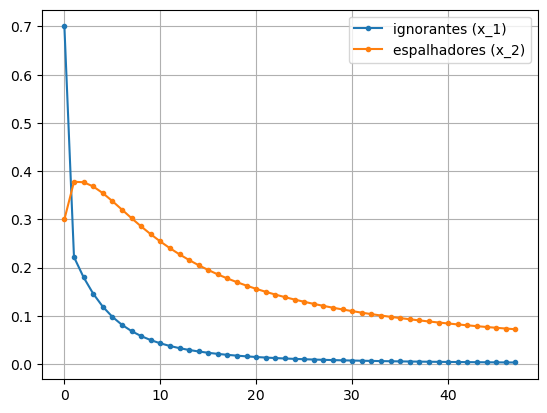

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [19]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x_1opt x_2opt],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()

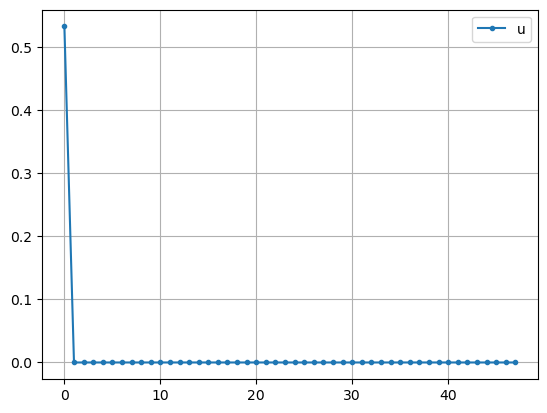

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [20]:
PyPlot.plot(uopt,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()
PyPlot.figure()

Observando os gráficos do controle ótimo no horizonte k percebemos que inicialmente a população de espalhadores se aumenta e de ignorantes diminui, depois de um tempo, com o controle a população de espalhadores se estabiliza em um valor baixo, e o amplo espalhamento de notícias falsas deixa de ser um risco.

#### 3.2 Otimização introduzindo restrições orçamentárias ao controle u ####

Agora, será introduzido um gasto máximo ao controle u, que sera u[k]<= 0.1, sendo mais uma restrição do nosso sistema.

In [21]:


#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k]-1 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
    @constraint(m, u[k] <= 0.1) 
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt = JuMP.value.(u)
x_1opt = JuMP.value.(x_1)
x_2opt = JuMP.value.(x_2)


println("x1 ignorantes:",x_1opt)
println("x_2 spreaders",x_2opt)
println("u",uopt)



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      294
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      245
        inequality constraints with only lower bounds:      147
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       98

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6000000e-01 7.00e-01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

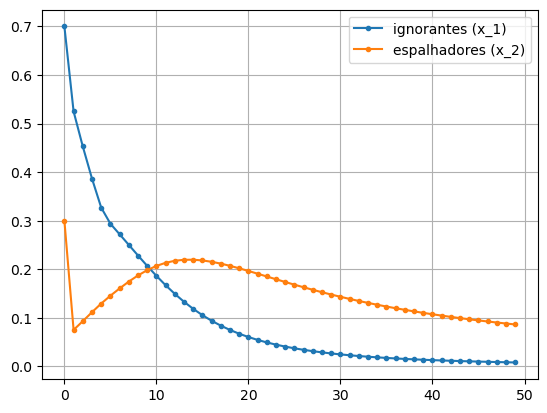

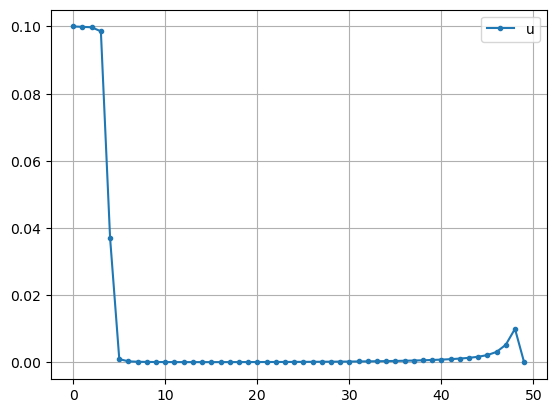

In [22]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x_1opt x_2opt],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.plot(uopt,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

Observando os gráficos percebe-se que ao inserir a restrição orçamentária no controle u ____________________, 

Controle Preditivo

In [7]:

x1 = zeros(k)
x2 = zeros(k)
uu = zeros(k-1)

x1[1] = x_1_init
x2[1] = x_2_init

for k in 1:T[10]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer))

    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m, u >= 0) #controle

    @constraint(m, x_1 + x_2 <= (γ / β)) 
    @NLconstraint(m, x_1 == x1[k] - β * x1[k] * x2[k] - b * u * x1[k])
    
    @NLconstraint(m, x_2 == x2[k] + β * x1[k] * x2[k] - γ * x2[k] * x2[k])
    
    @objective(m, Min, sum((x_1 + x_2 - (γ / β)).^2)) 
    
    optimize!(m)
    x1[k+1] = JuMP.value(x_1)
    x2[k+1] = JuMP.value(x_2)
    uu[k] = JuMP.value(u)
    
end


println("x1 ignorantes:",x1)
println("x_2 spreaders",x2)
println("u",uu)

#cortar ultimo ponto



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.3640002e-01 5.78e-01 9.49e-02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

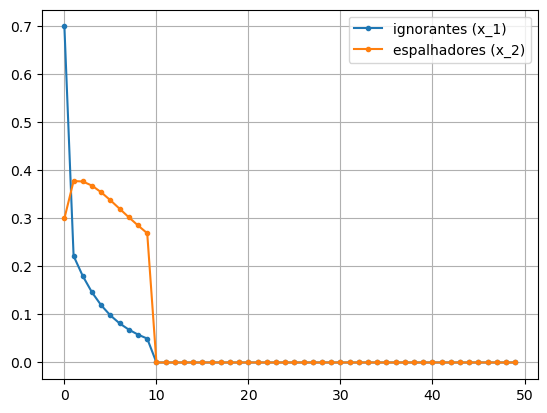

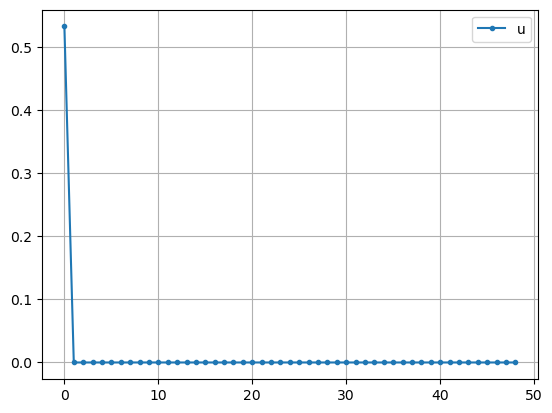

In [8]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x1 x2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.plot(uu,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

In [13]:
#PARAMETROS
rng = MersenneTwister(1234)

gama = rand!(rng, zeros(50))/2
beta = rand!(rng, zeros(50))/2;



In [14]:

#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (gama[k] / beta[k])) 
end
for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - beta[k] * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + beta[k] * x_1[k] * x_2[k] - gama[k] * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (gama[k] / beta[k])).^2)) 

optimize!(m)

uopt = JuMP.value.(u[1:48])
x_1opt = JuMP.value.(x_1[1:48])
x_2opt = JuMP.value.(x_2[1:48])

println("x1 ignorantes:",x_1opt)
println("x_2 spreaders",x_2opt)
println("u",uopt)

#cortar ultimo ponto

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      248
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      199
        inequality constraints with only lower bounds:      150
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       49

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.5373943e+00 7.00e-01 5.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

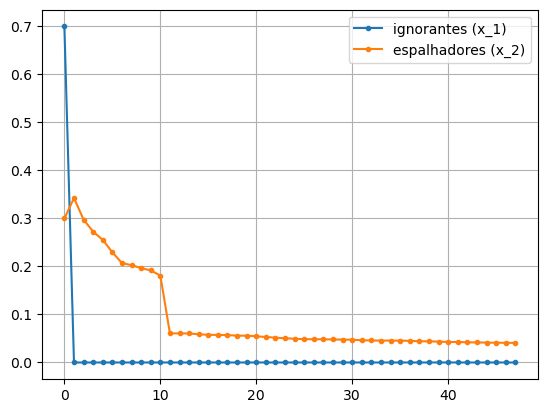

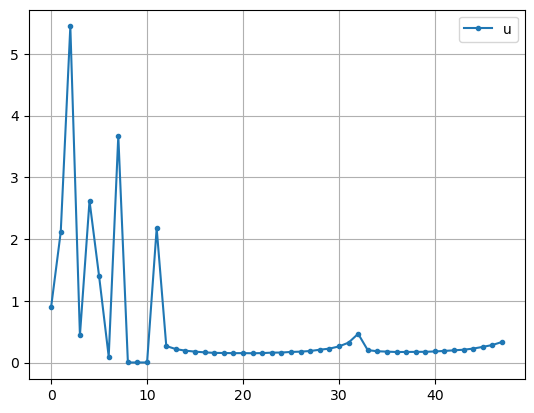

In [15]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x_1opt x_2opt],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.plot(uopt,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

Incerteza Controle preditivo

In [16]:

x1 = zeros(k)
x2 = zeros(k)
uu = zeros(k-1)

x1[1] = x_1_init
x2[1] = x_2_init

for k in 1:T[10]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer))

    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m, u >= 0) #controle

    @constraint(m, x_1 + x_2 <= (gama[k] / beta[k])) 
    @NLconstraint(m, x_1 == x1[k] - beta[k] * x1[k] * x2[k] - b * u * x1[k])
    
    @NLconstraint(m, x_2 == x2[k] + beta[k] * x1[k] * x2[k] - gama[k] * x2[k] * x2[k])
    
    @objective(m, Min, sum((x_1 + x_2 - (gama[k] / beta[k])).^2)) 
    
    optimize!(m)
    x1[k+1] = JuMP.value(x_1)
    x2[k+1] = JuMP.value(x_2)
    uu[k] = JuMP.value(u)
    
end


println("x1 ignorantes:",x1)
println("x_2 spreaders",x2)
println("u",uu)

#cortar ultimo ponto



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.6883029e-01 6.14e-01 1.15e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

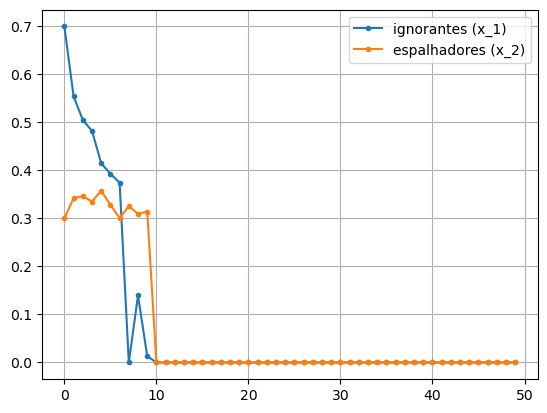

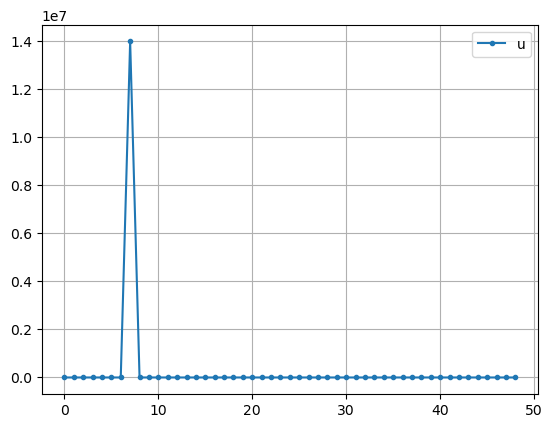

In [17]:
using PyPlot
PyPlot.svg(true)
PyPlot.plot([x1 x2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.plot(uu,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

## 4. Resultados e discussão ##

Neste seção, os resultados obtidos serão exibidos e discutidos. Mostre figuras, gráficos, imagens, curvas de compromisso, e o que mais puder melhor ilustrar seus resultados. A discussão deverá explicar o que significam os resultados e como interpretá-los. As limitações da sua abordagem/modelo também devem ser colocadas, bem como uma análise da sensibilidade dos resultados em relação às hipóteses feitas.


Utilize plots (veja exemplos  `PyPlot` [aqui](https://gist.github.com/gizmaa/7214002))

Aqui está um exemplo de uma tabela (em Markdown):

| Tabelas        | São           | Boas  |
| ------------- |:-------------:| -----:|
| col 3 é      | alinhado à direita |\$1600 |
| col 2 é      | centrado      |  \$12 |
| texto | também serve      |   \$1 |


## 5. Conclusão ##

Faça um resumo do que encontrou e dos seus resultados, e fale de pelo menos uma direção na qual  seu trabalho pode ser desenvolvido no futuro, algo que poderia ser interessante em decorrência do seu projeto.
